In [6]:
!pip install tensorflow


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, Conv2D, MaxPooling2D,
    BatchNormalization, Reshape, LSTM,
    Bidirectional, Concatenate, Input
)
from tensorflow.keras import regularizers


In [13]:
def create_cnn_rnn_model_merge():
    # Input layer
    inputs = Input(shape=(150, 150, 3))

    # CNN layers
    x = Conv2D(64, (3, 3), activation='relu')(inputs)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.35)(x)

    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    cnn_output = Dropout(0.35)(x)  # Keep the final CNN output

    # Get the spatial dimensions
    _, h, w, c = cnn_output.shape
    x = Reshape((h, w * c))(cnn_output)

    # First RNN layer
    rnn1_output = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.3)(rnn1_output)

    # Merge CNN output with the first RNN output
    merged_input = Concatenate()([x, Reshape((h, w * c))(cnn_output)])

    # Second RNN layer
    x = Bidirectional(LSTM(64))(merged_input)
    x = Dropout(0.3)(x)

    # Dense layers
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    return model


In [14]:
model = create_cnn_rnn_model_merge()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 148, 148, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 146, 146, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 73, 73, 64)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 64)     │            256 │ max_pooling2d_3[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 73, 73, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 71, 71, 64)     │         36,928 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 69, 69, 64)     │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 34, 34, 64)     │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 34, 34, 64)     │            256 │ max_pooling2d_4[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 34, 34, 64)     │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 32)     │         18,464 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 30, 30, 32)     │          9,248 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 15, 15, 32)     │              0 │ conv2d_11[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 15, 15, 32)     │            128 │ max_pooling2d_5[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 15, 15, 32)     │              0 │ batch_normalization_5… │
├──────────────────────

 Total params: 1,199,489 (4.58 MB)

 Trainable params: 1,199,169 (4.57 MB)

 Non-trainable params: 320 (1.25 KB)

In [15]:
import zipfile
import os

# Unzip the dataset
zip_path = '/content/processed_images.zip'  # Adjust to your zip file's name
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the extracted folders
os.listdir('/content/dataset')


['processed_images']

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/dataset/processed_images/train'
val_dir = '/content/dataset/processed_images/test'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [17]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 156s 9s/step - accuracy: 0.5517 - loss: 0.7000 - val_accuracy: 0.5207 - val_loss: 0.7180
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 184s 8s/step - accuracy: 0.6756 - loss: 0.6313 - val_accuracy: 0.4793 - val_loss: 0.7185
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.7282 - loss: 0.5784 - val_accuracy: 0.5041 - val_loss: 0.7723
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 155s 8s/step - accuracy: 0.7805 - loss: 0.5051 - val_accuracy: 0.5041 - val_loss: 1.1548
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 129s 8s/step - accuracy: 0.7866 - loss: 0.4863 - val_accuracy: 0.5041 - val_loss: 1.2955
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 127s 8s/step - accuracy: 0.7993 - loss: 0.4740 - val_accuracy: 0.5207 - val_loss: 1.0686
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.8077 - loss: 0.4163 - val_accuracy: 0.4959 - val_loss: 1.2498
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step - accuracy: 0.8580 - loss: 0.3707 - val_accuracy: 0.5041 - v

In [18]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7604 - loss: 0.4619
Validation Accuracy: 76.03%


In [19]:
model.save('/content/cnn_rnn_model_v2.h5')


In [21]:
model.save('/content/cnn_rnn_model_v2.keras')


In [22]:
from google.colab import files
files.download('/content/cnn_rnn_model_v2.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
true_labels = val_generator.classes
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Check shapes
print("True labels shape:", true_labels.shape)
print("Predicted labels shape:", predicted_labels.shape)


4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
True labels shape: (121,)
Predicted labels shape: (121,)


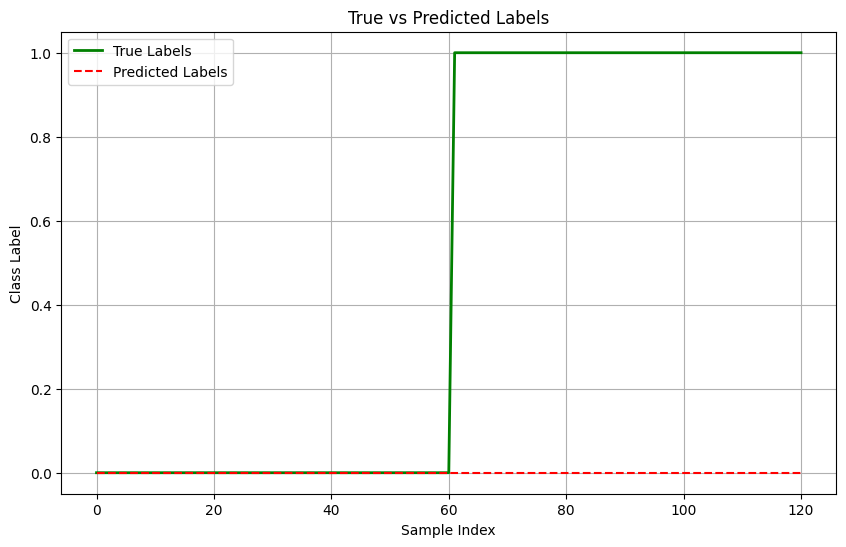

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(true_labels, label='True Labels', color='green', linewidth=2)
plt.plot(predicted_labels, label='Predicted Labels', color='red', linestyle='dashed')
plt.legend()
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.grid(True)
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Ensure your model and validation/test generator are loaded
# true_labels = val_generator.classes
# predictions = model.predict(val_generator)


In [26]:
# If using sigmoid activation (1 neuron output)
predicted_labels = (predictions > 0.5).astype(int).flatten()


<Figure size 800x600 with 0 Axes>

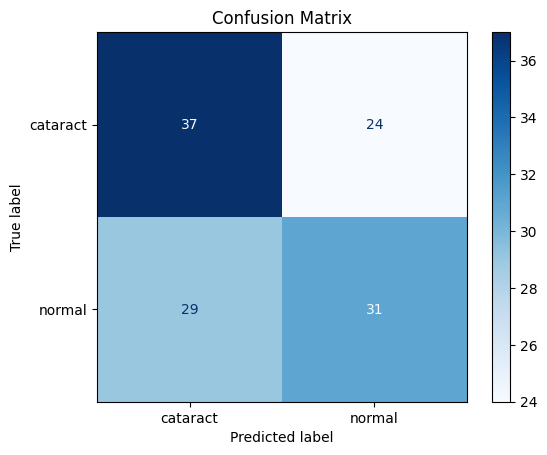

In [27]:
# Build the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())

# Plot the matrix nicely
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Print detailed performance metrics
report = classification_report(true_labels, predicted_labels, target_names=val_generator.class_indices.keys())
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    cataract       0.56      0.61      0.58        61
      normal       0.56      0.52      0.54        60

    accuracy                           0.56       121
   macro avg       0.56      0.56      0.56       121
weighted avg       0.56      0.56      0.56       121

